This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will analyze feature selection and PCA techniques in toy examples for understand their fundamentals.

## Table of Contents

1. [Feature Selection](#feature_selection)
 1. [Filter methods](#filter_methods)
 2. [Wrapper methods](#wrapper_methods)  
 3. [Embedded methods](#embedded_methods)
2. [Feature extraction / dimensionality reduction](#feature_extraction)
 1. [PCA](#pca)
3. [References](#references)
4. [Project Ideas](#ideas)

---
## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
<a id='feature_selection'></a>
# 1. Feature Selection

The aim of feature selection is to select the optimum subset of features/variables in order to reduce the dimensionality of the dataset (and thus mitigating the potential overfitting) and improve interpretability.

<a id='filter_methods'></a>
## 1.A Filter methods 

Filter methods rank the input features according to a predefined relevance score. The following are examples of filters for regression and classification problems

<a id='filter_regression'></a>
### Regression problems

Let's analyze [filter methods]((https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)) for regression ([f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression), [mutual_info_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)) using a simple example:

<div class="alert alert-block alert-info">
<b>Example 1</b>

Let $x_1, x_2,x_3$ be random variables uniformly distributed within the interval $[0,1]$. Target variable $y$ depends on these variables, as follows

$$y = x_1 + \sin{(6\pi x_2)} + 0.1\mathcal{N}(0, 1),$$

Specifically:

* $y$ depends linearly on $x_1$
* $y$ non linear dependency on $x_2$
* $y$ does not depend on $x_3$

therefore, $x_3$ is **irrelevant** for $y$. 

*Note: this example extracted from [here](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)*
</div>

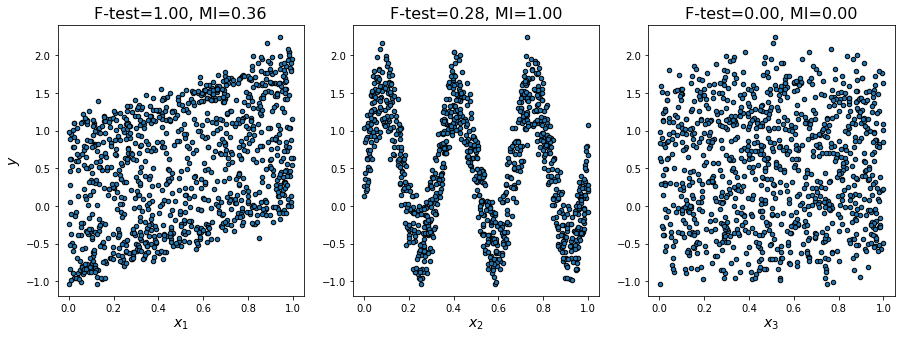

In [2]:
from src.filter_methods import example_one

x1, x2, x3, y = example_one()
#first graph the relationship is linear and positive. 
#second graph non linear relationship. 

<a id='filter_classification'></a>
### Classification problems

Let's define the following classification problems:

<div class="alert alert-block alert-info">
<b>Example 2</b>: linearly separable problem.
    
Let $\{\mathbf{x}_1, \mathbf{x}_2,\ldots, \mathbf{x}_5\}$ be a set of random variables, such that
    
- $\mathbf{x}_1 = z+ \mathcal{N}(0,\sigma_1), \quad z \in \{-\mu,+\mu\}$ 
- $\mathbf{x}_2 = -3\mathbf{x}_1 + \mathcal{N}(0,\sigma_2)$
- $\mathbf{x}_3 = \mathcal{N}(0,2)$
- $\mathbf{x}_4 = \mathcal{U}(0,1)$
        
</div>

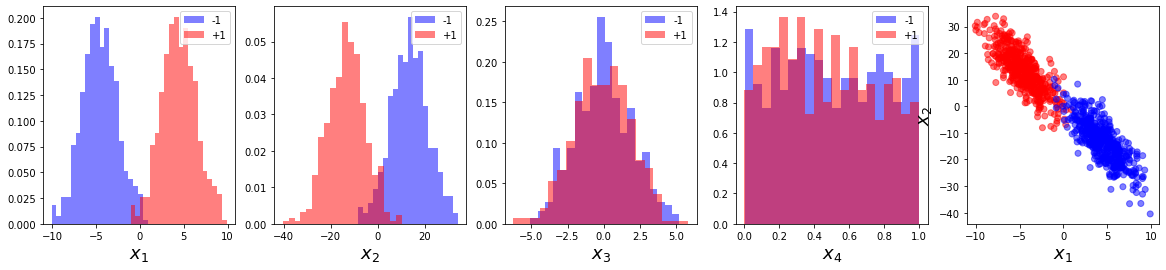

CORRELATION MATRIX:


,x1,x2,x3,x4
x1,1.000000,-0.949153,-0.019679,-0.049805
x2,-0.949153,1.000000,0.014887,0.055296
x3,-0.019679,0.014887,1.000000,-0.018423
x4,-0.049805,0.055296,-0.018423,1.000000


In [3]:
from src.filter_methods import example_two

#X, y = example_two(mu = 2.5, sigma_1 = 2, sigma_2 = 5)

# Uncomment this and see the differences

X, y = example_two(mu = 4.5, sigma_1 = 2, sigma_2 = 5)
#X, y = example_two(mu = 0.5, sigma_1 = 2, sigma_2 = 5)

<div class = "alert alert-success">
<b>Question 1</b>: What is the best separating (hyper)plane?
</div>

You can do both x1 and x2. Using the two hyperparameters will separate the red and blue points perfectly. 

#### Filter methods for classification

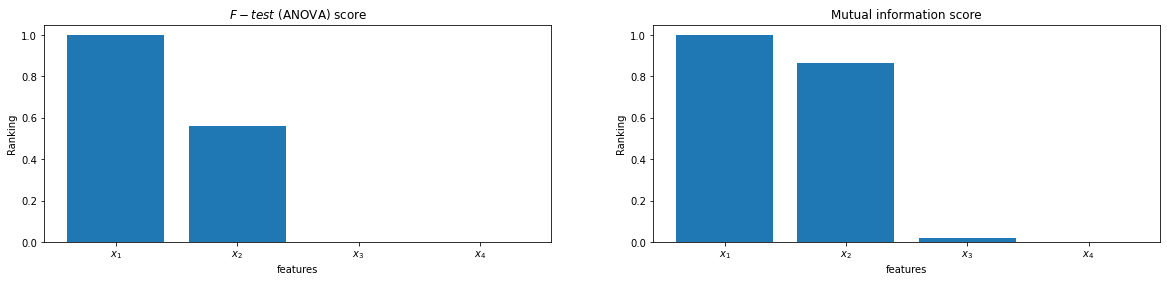

In [4]:
from src.filter_methods import filter_methods_classification

filter_methods_classification(X, y, feat_names = ['$x_1$','$x_2$','$x_3$','$x_4$'])

Please, note here that the **scores have been normalized** so you must be careful when comparing different situations.

<div class="alert alert-block alert-info">
<b>Example 3</b>: Non-linear separable problem.
    
Let $\{\mathbf{x}_1, \mathbf{x}_2,\ldots, \mathbf{x}_{24}\}$ be a set of random variables, such that
    
- $\mathbf{x}_1$ and $\mathbf{x}_2$ define an XOR classification problem 
- $\mathbf{x}_3 = 3(\mathbf{x}_1+\mathbf{x}_2)+ \mathcal{N}(0,2)$
- $\mathbf{x}_4 = 2\sqrt{\mathbf{x}_1+\mathbf{x}_2} + \mathcal{N}(0,2)$
- $\mathbf{x}_i = \mathcal{N}(0,4),\quad\forall i=5,\ldots,24$    
    
</div>

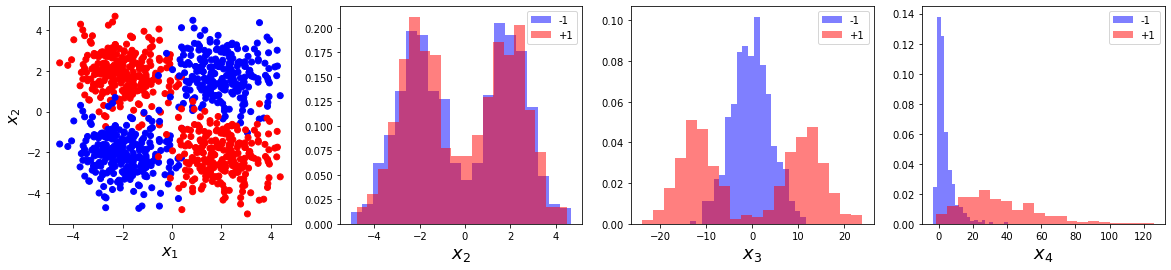

In [5]:
from src.filter_methods import example_three

X, y = example_three(mu=2, sigma=1)

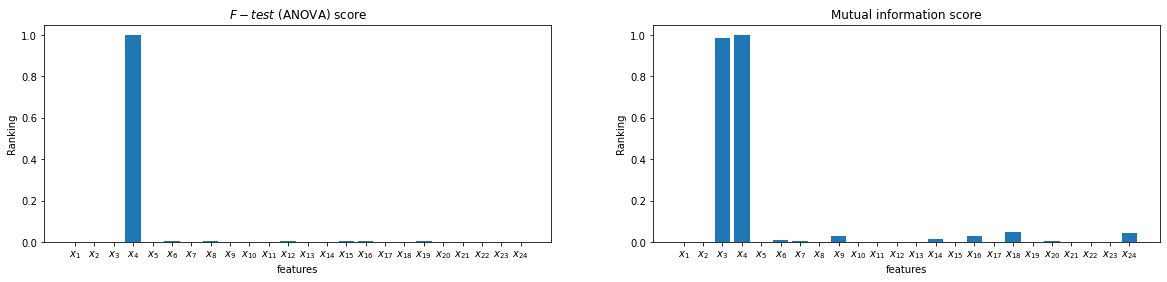

In [6]:
feat_names = ['$x_{'+ str(i+1) + '}$' for i in range(24)]
filter_methods_classification(X, y, feat_names = feat_names)

You take into account the mean so the mean is the same for all the graphs because it takes the mean of the groups. 

<div class = "alert alert-success">
<b>Question 2</b>: Which are the most important features?
</div>

### Pima Indian Diabetes Dataset

<div class="alert alert-block alert-info">
<b>Example 4</b>: Real classification problem

Apply filter methods to Pima Indian Diabetes dataset
    
</div>

In [7]:
from src.ddbb import load_pima_indian
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

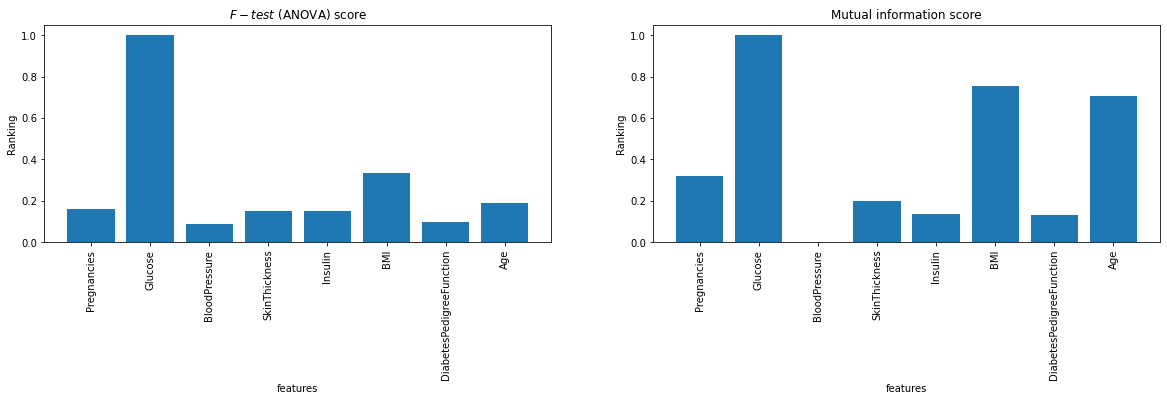

In [8]:
# Let's apply filter methods
filter_methods_classification(X.values, y.values, feat_names = X.columns, rotation=True)

Now, let's fit a KNN algorithm on a selection of features ... 

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	79.69	74.48
SEN:	64.68	55.22
ESP:	87.73	84.80
PPV:	73.86	66.07
F1:	68.97	60.16


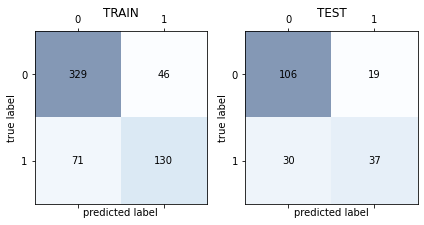

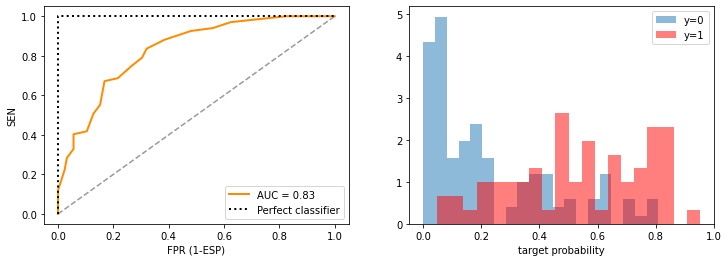

Selected features:  ['Glucose' 'BMI' 'Age']


In [9]:
# Pipeline
from sklearn.pipeline import make_pipeline

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Customized function
from src.ml_utils import analyze_train_test_performance


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

# We use a pipeline here
my_model = make_pipeline(
    StandardScaler(),
    SelectKBest(mutual_info_classif, k=3), # you might want to try f_classif
    GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1,25)}, cv=3),
)
my_model.fit(X_train, y_train)

# Analyze performance
analyze_train_test_performance(my_model,X_train,X_test,y_train,y_test)

# Selected features
features = X.columns
mask = my_model.named_steps['selectkbest'].get_support()
selected_features = features[mask].values

print('Selected features: ', selected_features)

<a id='wrapper_methods'></a>
## 1.B Wrapper methods

Wrappers utilize a machine learning algorithm of interest as a **black box** to score subsets of variables according to their predictive power. When estimating the number of selected features the normally use **backward/forward** procedures together with **cross-validation** techniques to assess the performance of each subset. 

We are using:

- [Sequential Feature Selector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/), by [mlextend](http://rasbt.github.io/mlxtend/). See the [documentation](http://rasbt.github.io/mlxtend/installation/) page for installing


```python
pip install mlextend
```


There is a sklearn option:
- [SequentialFeatureSelection](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection) which has been recently released but it does not provide as many information as mlextend. 



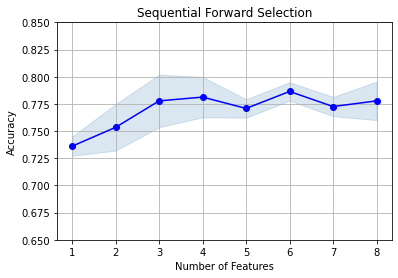

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.7447916666666666, 0.7239583333333334, 0.739...",0.736111,"(Glucose,)",0.019921,0.00885246,0.00625964
2,"(1, 7)","[0.78125, 0.75, 0.7291666666666666]",0.753472,"(Glucose, Age)",0.0481665,0.0214042,0.0151351
3,"(1, 5, 7)","[0.8020833333333334, 0.7864583333333334, 0.744...",0.777778,"(Glucose, BMI, Age)",0.0544157,0.0241812,0.0170987
4,"(1, 5, 6, 7)","[0.7916666666666666, 0.796875, 0.7552083333333...",0.78125,"(Glucose, BMI, DiabetesPedigreeFunction, Age)",0.0417134,0.0185366,0.0131074
5,"(0, 1, 5, 6, 7)","[0.78125, 0.7708333333333334, 0.7604166666666666]",0.770833,"(Pregnancies, Glucose, BMI, DiabetesPedigreeFu...",0.0191394,0.00850517,0.00601407
6,"(0, 1, 3, 5, 6, 7)","[0.796875, 0.7864583333333334, 0.7760416666666...",0.786458,"(Pregnancies, Glucose, SkinThickness, BMI, Dia...",0.0191394,0.00850517,0.00601407
7,"(0, 1, 3, 4, 5, 6, 7)","[0.78125, 0.7760416666666666, 0.7604166666666666]",0.772569,"(Pregnancies, Glucose, SkinThickness, Insulin,...",0.019921,0.00885246,0.00625964
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7708333333333334, 0.8020833333333334, 0.760...",0.777778,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.0398419,0.0177049,0.0125193


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Load the data
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2, stratify=y)

# Standarization
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

# Feature Selection analysis
knn = KNeighborsClassifier(n_neighbors=23)
sfs = SFS(knn, 
          k_features=X.shape[1], 
          forward=True, 
          scoring='accuracy',
          cv=3)

sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)


# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', ylabel = 'Accuracy')
plt.ylim([0.65, 0.85])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

### Using the Selected Feature Subset For Making New Predictions

Selected features: ('Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age')
PERFORMANCE METRICS
	TRAIN	TEST
ACC:	79.34	75.52
SEN:	60.70	50.75
ESP:	89.33	88.80
PPV:	75.31	70.83
F1:	67.22	59.13


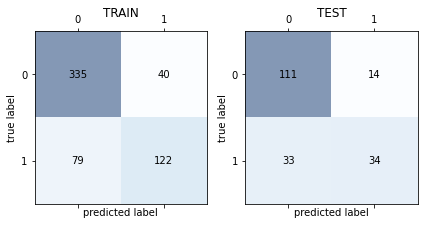

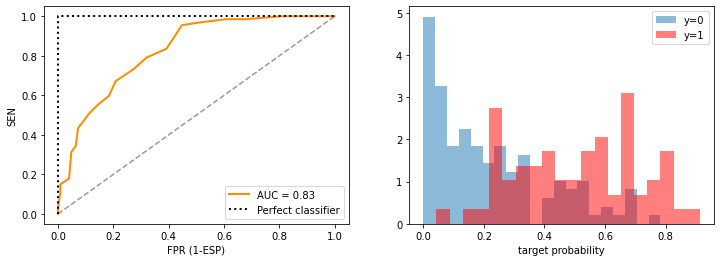

In [11]:
knn = KNeighborsClassifier(n_neighbors=23)
sfs = SFS(knn, 
          k_features=6, 
          forward=True, 
          scoring='accuracy',
          cv=3)

sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)

print('Selected features:', sfs.k_feature_names_)

X_train_fs = sfs.transform(X_train_norm)
X_test_fs  = sfs.transform(X_test_norm)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn_fs = knn.fit(X_train_fs, y_train)

analyze_train_test_performance(knn_fs,X_train_fs,X_test_fs,y_train,y_test)

### Sequential Backward Selection

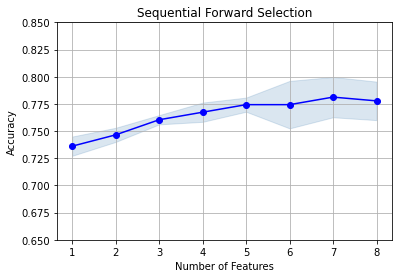

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7708333333333334, 0.8020833333333334, 0.760...",0.777778,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.0398419,0.0177049,0.0125193
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7708333333333334, 0.8072916666666666, 0.765...",0.78125,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.0417134,0.0185366,0.0131074
6,"(0, 1, 2, 4, 5, 6)","[0.78125, 0.796875, 0.7447916666666666]",0.774306,"(Pregnancies, Glucose, BloodPressure, Insulin,...",0.049108,0.0218226,0.0154309
5,"(0, 1, 2, 5, 6)","[0.7760416666666666, 0.78125, 0.765625]",0.774306,"(Pregnancies, Glucose, BloodPressure, BMI, Dia...",0.014618,0.00649593,0.00459332
4,"(0, 1, 5, 6)","[0.7552083333333334, 0.7708333333333334, 0.776...",0.767361,"(Pregnancies, Glucose, BMI, DiabetesPedigreeFu...",0.019921,0.00885246,0.00625964
3,"(1, 5, 6)","[0.7604166666666666, 0.7552083333333334, 0.765...",0.760417,"(Glucose, BMI, DiabetesPedigreeFunction)",0.00956972,0.00425259,0.00300703
2,"(1, 5)","[0.7447916666666666, 0.7552083333333334, 0.739...",0.746528,"(Glucose, BMI)",0.014618,0.00649593,0.00459332
1,"(1,)","[0.7447916666666666, 0.7239583333333334, 0.739...",0.736111,"(Glucose,)",0.019921,0.00885246,0.00625964


In [13]:
# Feature Selection analysis
knn = KNeighborsClassifier(n_neighbors=23)
sfs = SFS(knn, 
          k_features=1, 
          forward=False, 
          scoring='accuracy',
          cv=3)

sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)


# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', ylabel = 'Accuracy')
plt.ylim([0.65, 0.85])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

<div class = "alert alert-success">
<b>Question 3</b>: Implement a SBS process
    
- `k_features = 1`
- `forward = False`
    
</div>

### Sequential Feature Selection and GridSearch

In [14]:
from sklearn.pipeline import Pipeline


sfs = SFS(estimator=KNeighborsClassifier(), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3)

pipe = Pipeline([('sfs', sfs), 
                 ('knn', knn)])

param_grid = [{
    'sfs__k_features': range(1,9),
    'sfs__estimator__n_neighbors': [15,20,25]
}]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=3)

# run gridsearch
gs = gs.fit(X_train_norm, y_train)

Best score: 0.7777777777777778
Best parameters via GridSearch {'sfs__estimator__n_neighbors': 15, 'sfs__k_features': 8}
PERFORMANCE METRICS
	TRAIN	TEST
ACC:	80.38	76.56
SEN:	63.68	47.76
ESP:	89.33	92.00
PPV:	76.19	76.19
F1:	69.38	58.72


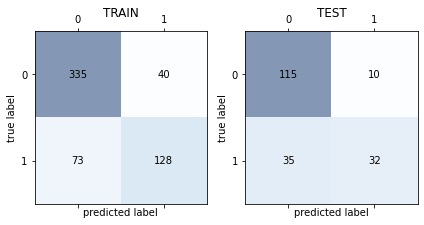

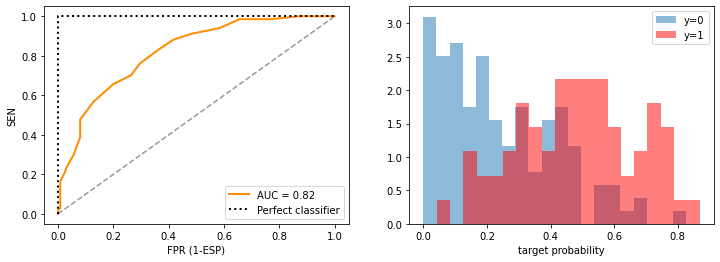

In [16]:
print('Best score:', gs.best_score_)
print("Best parameters via GridSearch", gs.best_params_)

pipe.set_params(**gs.best_params_).fit(X_train_norm, y_train)
analyze_train_test_performance(pipe,X_train_norm,X_test_norm,y_train,y_test)

## 1.C Embedded Methods

Embedded methods perform feature selection during the modelling algorithm's execution. Common embedded methods include Decision Trees, Random Forest, Lasso, Support Vector Machines, among others.


We will be using 
- [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model) implemented by sklearn.

### An extended feature selection method among practitioners

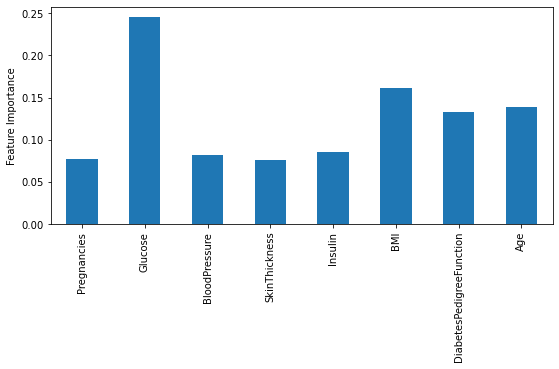

- Selected features:  Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
- Threshold (mean importance):  0.125


In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from src.ml_utils import plot_importances

# Load the data
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

clf = RandomForestClassifier().fit(X, y)
plot_importances(clf.feature_importances_, X.columns)

# Selection
selector = SelectFromModel(clf).fit(X,y)
print('- Selected features: ', X.columns[selector.get_support()])
print('- Threshold (mean importance): ', selector.threshold_)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	78.82	73.96
SEN:	59.70	53.73
ESP:	89.07	84.80
PPV:	74.53	65.45
F1:	66.30	59.02


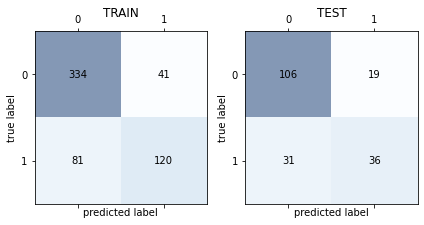

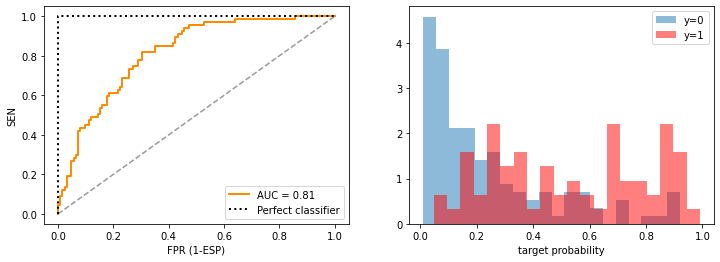

Selected features:  ['Glucose' 'BMI' 'DiabetesPedigreeFunction' 'Age']


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

my_model = make_pipeline(SelectFromModel(RandomForestClassifier(random_state=0)),LogisticRegression())
my_model.fit(X_train, y_train)

my_model.fit(X_train,y_train)

analyze_train_test_performance(my_model,X_train,X_test,y_train,y_test)

# Selected features
features = X.columns
mask = my_model.named_steps['selectfrommodel'].get_support()
selected_features = features[mask].values

print('Selected features: ', selected_features)


<div class = "alert alert-success">
<b>Question 4</b>: Implement a pipeline that:
    
- Select features based on RandomForest feature importance
- Applies a Logistic Regression classifier
</div>

### Recursive Feature Elimination

Recursive Feature Elimination ([original paper](http://clopinet.com/isabelle/Papers/geneselect.pdf)): select features by recursively considering smaller and smaller sets of features based on `coef_` or `feature_importances_` attributes. 

In scikit-learn:
-  [feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)
-  [feature_selection.RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)


Optimal number of features : 6


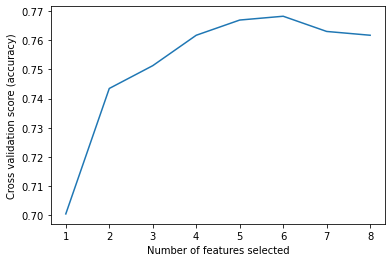

In [31]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=0),
    step=1,
    cv=3,
    scoring="accuracy",
    min_features_to_select=1,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()

---
<a id='feature_extraction'></a>
# 2. Feature Extraction / dimensionality reduction

We will be working with the life expectancy dataset

<a id='pca'></a>
## 2.1 PCA

Let's start first with an easy example

*Note: this example was extracted from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). I encourage you to take a depth look at this notebook for understading PCA*

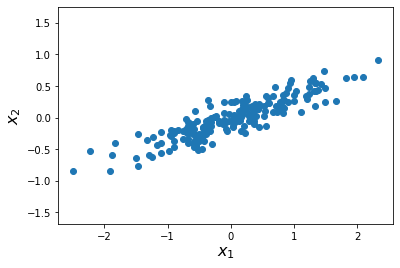

In [33]:
from src.pca_utils import toy_example_pca

X = toy_example_pca()

Recall that PCA transforms (linearly) the original space into a an orthonormal basis (principal components) in which different individual dimensions of the data are linearly uncorrelated:
 - [Principal components](https://en.wikipedia.org/wiki/Principal_component_analysis#Quantitative_finance) are are a sequence of direction vectors, where the $i^{{\text{th}}}$ vector is the direction of a line that best fits the data while being orthogonal to the first  $i-1$ vectors
 - Principal components are eigenvectors of the data's covariance matrix

Components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Variance of each axis (largest eigenvalues): [0.7625315 0.0184779]
%Variance for each axis: [0.97634101 0.02365899]


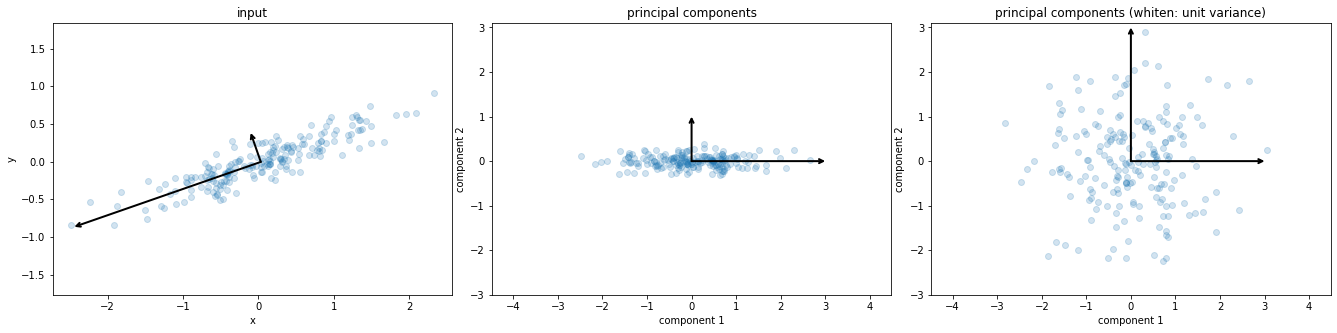

In [36]:
from src.pca_utils import plot_pca_toy_example

pca = plot_pca_toy_example(X)

print('Components:\n', pca.components_)
print('Variance of each axis (largest eigenvalues):', pca.explained_variance_)
print('%Variance for each axis:', pca.explained_variance_ratio_)

### PCA for dimensionality reduction

Project our 2D data into 1D

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X) # this X is on the transformed space ...

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


To see the transformed data in the original space

This transformation retains the 97.63% of the variance


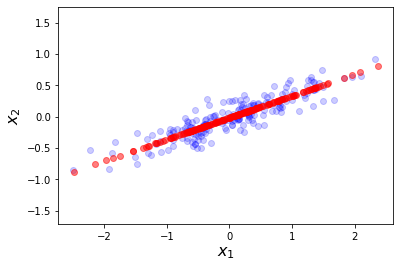

In [38]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], c = 'b', alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], c='r', alpha=0.5)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.axis('equal');

print('This transformation retains the {:.2f}% of the variance'.format(100*pca.explained_variance_ratio_[0]))

<div class="alert alert-block alert-info">
<b>Example 6</b>: Apply PCA to Pima Indian Database data

- How many components do we need? 
- Visualize your data
- Train a ML model using the transformed features
</div>

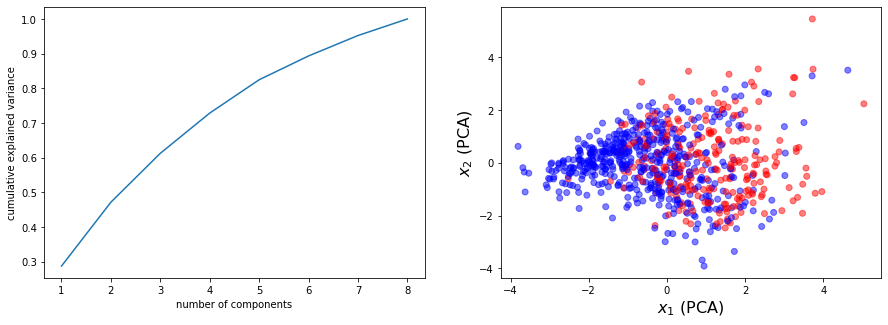

In [39]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,X.shape[1]+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Data visualization (just 2 components)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=-1*y, cmap=cm_bright, alpha=0.5)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)


plt.show()

### Explainability

Even if these two variables look like promising, **do they provide with any interpretation about the data?** You might find of interest the following:

- [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/)
- [Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)
- [The Building Blocks of Interpretability](https://distill.pub/2018/building-blocks/) (deep learning)

In [40]:
# Just a quick view, not a proper training
lr =  LogisticRegression().fit(X_pca, y)
print('ACC: {:.3f}'.format(lr.score(X_pca, y)))

ACC: 0.733


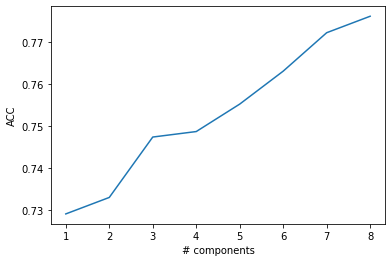

In [41]:
# Just a quick view, not a proper training
acc_score = [] 
for i in range(1,X.shape[1]+1):
    X_pca = PCA(n_components=i).fit_transform(X_scaled)
    lr =  LogisticRegression().fit(X_pca, y)
    acc_score.append(lr.score(X_pca, y))

plt.plot(np.arange(X.shape[1])+1,acc_score)
plt.xlabel('# components')
plt.ylabel('ACC')
plt.show()

---
<a id='references'></a>
# References

[1] [A review of feature selection methods with applications](https://bib.irb.hr/datoteka/763354.MIPRO_2015_JovicBrkicBogunovic.pdf)

[2] [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html) by sklearn

[3] [MLxtend Documentation](http://rasbt.github.io/mlxtend/)

---
<a id='ideas'></a>
# Project Ideas

Taking into account the classic machine learning pipeline, here there are some ideas that you might want to consider for your project:

1. Is it worth transforming and/or creating new features based on the data distribution or your domain knowledge? Justify your answer. 
    - Comment on variable(s) to be transfomed
    - Comment on variable(s) to be created


2. Is it worth performing feature selection in your dataset? Justify your answer. If you decide to perform feature selection, you might want to ...
    - ... analyze the relationship between predictive features and the output using filter methods
    - ... analyze feature importance using `feature_importances_` 
    - ... use filter, wrapper or embedded methods to filter out irrelevant features


3. Is it worth applying PCA to your dataset? Justify your answer. If you decide to apply PCA, you might want to ...
    - ... discuss on `n_components` to be using
    - ... analyze the performance of your ML pipeline when using PCA
    - ... visualize you data by 2D/3D plots trying to provide any explanations to your problem


4. Is the overall performance (comparing train and test set) good enough? If not, you might want to iterate again over steps 1, 2 and 3. If you do, comment on this. 

In all above, justify your decisions.